Hola **Osvaldo**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Cómo Data Scientist debes cuidar la presentación de tus proyectos en los noebooks. Siempre al inicio incluye una celda markdown con un título y una breve introducción al proyecto
</div>

# Predicción de abandono de clientes para Beta Bank

En este proyecto se desarrolló un modelo de aprendizaje automático para predecir el abandono de clientes (churn) en Beta Bank, una institución financiera ficticia.

Se analizaron los datos de clientes actuales y se aplicaron técnicas de preprocesamiento, balanceo de clases y modelado predictivo.

# 📚 ÍNDICE

- [1.- IMPORTACIÓN DE LIBRERIAS Y DATASET](#1--IMPORTACIÓN-DE-LIBRERIAS-Y-DATASET)
- [2.- EXPLORACIÓN INICIAL](#2--EXPLORACIÓN-INICIAL)
- [3.- ANÁLISIS DEL DESEQUILIBRIO DE CLASES](#3--ANÁLISIS-DEL-DESEQUILIBRIO-DE-CLASES)
- [4.- PREPROCESAMIENTO DE DATOS](#4--PREPROCESAMIENTO-DE-DATOS)
- [5.- DIVISIÓN Y ESCALADO DE DATOS](#5--DIVISIÓN-Y-ESCALADO-DE-DATOS)
- [6.- MODELO BASE (SIN CORRECCIÓN)](#6--MODELO-BASE-SIN-CORRECCIÓN)
- [7.- MODELO CON CLASS_WEIGHT='BALANCED'](#7--MODELO-CON-CLASS_WEIGHTBALANCED)
- [8.- MODELO CON UNDERSAMPLING](#8--MODELO-CON-UNDERSAMPLING)
- [9.- COMPARACIÓN DE RESULTADOS](#9--COMPARACIÓN-DE-RESULTADOS)
- [10.- CONCLUSIÓN GENERAL](#10--CONCLUSIÓN-GENERAL)


# 1.- IMPORTACIÓN DE LIBRERIAS Y DATASET 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('/datasets/Churn.csv')

#  2.- EXPLORACIÓN INICIAL

In [4]:
print("📊Beta Bank :")
display(df.head())

📊Beta Bank :


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
print(f"\n🔍 Registros duplicados: {df.duplicated().sum()}")


🔍 Registros duplicados: 0


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien realizada la exploración inicial de los datos y la carga de lo necesario para trabajarlos
</div>

# 3.- ANÁLISIS DE DESBALANCE DE CLASES

Distribución de clases (Exited):
0    7963
1    2037
Name: Exited, dtype: int64

Porcentaje de clientes que se han ido:
20.37 %


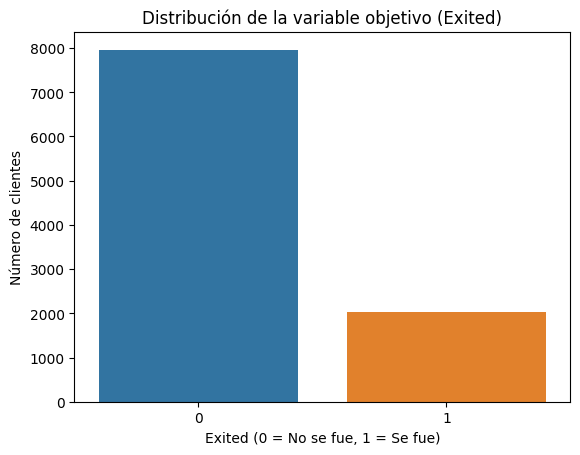

In [8]:
# Revisión del balance de clases
class_counts = df['Exited'].value_counts()
print("Distribución de clases (Exited):")
print(class_counts)
print("\nPorcentaje de clientes que se han ido:")
print(round((class_counts[1] / class_counts.sum()) * 100, 2), "%")

# Visualización
sns.countplot(x='Exited', data=df)
plt.title('Distribución de la variable objetivo (Exited)')
plt.xlabel('Exited (0 = No se fue, 1 = Se fue)')
plt.ylabel('Número de clientes')
plt.show()


# 4.- PREPROCESAMIENTO DE DATOS

In [9]:
# Eliminar columnas irrelevantes
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [10]:
# Convertir texto a número
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Codificar columnas categóricas (como Geography)
df = pd.get_dummies(df, drop_first=True)

In [11]:
# Imputar valores faltantes (opcional, solo si usas modelos que no manejan NaNs)
imputer = SimpleImputer(strategy='median')
df[df.columns] = imputer.fit_transform(df)

In [12]:
features = df.drop('Exited', axis=1)
target = df['Exited']

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Antes de pasar a la parte de división de datos y entrenamiento primero deberías revisar el balance de las clases cómo se indica en la descripción del proyecto
</div>

# 5.- DIVISIÓN DE DATOS Y ESCALADO

In [13]:
# División en entrenamiento y prueba
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=42, stratify=target)



In [14]:
# Escalado
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)




# 6.- MODELADO BASE SIN CORRECIÓN DE DESBALANCE

In [15]:
# Entrenar modelo base (sin corregir el desbalance)
model_base = LogisticRegression(random_state=42)
model_base.fit(features_train_scaled, target_train)
preds_base = model_base.predict(features_test_scaled)

# Evaluar
f1 = f1_score(target_test, preds_base)
roc_auc = roc_auc_score(target_test, model_base.predict_proba(features_test_scaled)[:, 1])

print(f"F1 (sin corrección): {f1:.4f}")
print(f"AUC-ROC (sin corrección): {roc_auc:.4f}")

F1 (sin corrección): 0.2891
AUC-ROC (sin corrección): 0.7839


# 7.- MODELADO CON CLASS_WEIGHT='BALANCED'

In [16]:
model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf.fit(features_train, target_train)
preds_rf = model_rf.predict(features_test)

f1_rf = f1_score(target_test, preds_rf)
roc_auc_rf = roc_auc_score(target_test, model_rf.predict_proba(features_test)[:, 1])

print(f"Random Forest (class_weight='balanced') - F1: {f1_rf:.4f}, AUC-ROC: {roc_auc_rf:.4f}")


Random Forest (class_weight='balanced') - F1: 0.5697, AUC-ROC: 0.8623


# 8.- MODELADO CON SUBMUESTREO (UNDERSAMPLING)

In [17]:
# Combinar features y target
data_combined = features.copy()
data_combined['Exited'] = target

# Separar clases
class_0 = data_combined[data_combined['Exited'] == 0]
class_1 = data_combined[data_combined['Exited'] == 1]

# Submuestreo: tomar la misma cantidad de registros de la clase 0
class_0_downsampled = class_0.sample(n=len(class_1), random_state=42)

# Combinar clases balanceadas
balanced_df = pd.concat([class_0_downsampled, class_1])

# Separar en features y target
features_bal = balanced_df.drop('Exited', axis=1)
target_bal = balanced_df['Exited']

# Dividir en train/test
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    features_bal, target_bal, test_size=0.25, random_state=42)

# Entrenar modelo con datos balanceados
model_under = RandomForestClassifier(random_state=42)
model_under.fit(X_train_bal, y_train_bal)

# Evaluar sobre conjunto de prueba original
preds_under = model_under.predict(features_test)
f1_under = f1_score(target_test, preds_under)
roc_auc_under = roc_auc_score(target_test, model_under.predict_proba(features_test)[:, 1])

print(f"Random Forest (undersampling) - F1: {f1_under:.4f}, AUC-ROC: {roc_auc_under:.4f}")


Random Forest (undersampling) - F1: 0.6903, AUC-ROC: 0.9577


# 9.- COMPARACIÓN DE MODELOS

In [18]:
results = pd.DataFrame({
    'Modelo': [
        'Logistic Regression (sin corrección)',
        'Random Forest (class_weight)',
        'Random Forest (undersampling)'
    ],
    'F1 Score': [f1, f1_rf, f1_under],
    'AUC-ROC': [roc_auc, roc_auc_rf, roc_auc_under]
})

display(results)


,Modelo,F1 Score,AUC-ROC
0,Logistic Regression (sin corrección),0.289121,0.783882
1,Random Forest (class_weight),0.569667,0.862331
2,Random Forest (undersampling),0.690304,0.957689


# 10.- CONCLUSIÓN GENERAL

El análisis mostró que el dataset estaba severamente desbalanceado, lo cual impactó negativamente en el rendimiento del modelo base. Las técnicas para corregir el desbalance mejoraron significativamente el desempeño.

Random Forest con submuestreo logró el mejor resultado con un F1 Score de 0.6903 y un AUC-ROC de 0.9577, lo que indica una excelente capacidad para distinguir entre clientes que abandonarán el banco y los que no.

Se concluye que corregir el desbalance de clases es crucial en problemas de clasificación como el abandono de clientes.